<a href="https://colab.research.google.com/github/GIBD/GIBDnews/blob/master/GIBDnews_2_Analisis_Exploratorio_y_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIBDnews**
**Aplicación de Técnicas de Minería de Textos a noticias** 

**Parte 2**


---
#**Fase de Obtención y Preparación de los Textos**

---


---

Conexión de Collaboratory con Google Drive

---

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


---

Seteo de directorio de trabajo

---

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/GIBDnews/data")

---

Se importa el repositorio de noticias generado en la etapa anterior (newsoctubre2019.csv)

---

In [8]:
import pandas as pd 
news = pd.read_csv('news_abril_todas_20200416.csv') 
news

,news_paper,category,link,date,title,abstract,author,key_words,body
0,clarin,deportes,https://www.clarin.com//deportes/andres-perale...,2020-04-11,El “Pablo Vico” de España: tiene 83 años y pas...,Andrés Perales vive hace casi tres décadas en ...,[],MálagaLiga De EspañaCoronavirusCuarentena,La cuarentena nos obligó a quedarnos en casa y...
1,clarin,deportes,https://www.clarin.com//deportes/adelantan-bar...,2020-04-11,Adelantan que en Barcelona se habrían pagado s...,El 'BarçaGate' sigue sumando capítulos. El dia...,[],FC BarcelonaLionel Messi,Ha sido la temporada de los escándalos para Ba...
2,clarin,deportes,https://www.clarin.com//deportes/jana-pittman-...,2020-04-11,"Jana Pittman, la campeona mundial que lucha en...",La atleta es una de los 47 residentes que fuer...,[],CoronavirusAtletismo,"En Argentina, Paula Pareto es la cara más visi..."
3,clarin,deportes,https://www.clarin.com//deportes/oms-pidio-par...,2020-04-11,Coronavirus: la OMS pidió que paren el fútbol ...,La Organización Mundial de la Salud instó a qu...,[],BielorrusiaCoronavirus,La Organización Mundial de la Salud (OMS) le p...
4,clarin,deportes,https://www.clarin.com//deportes/arana-amuchas...,2020-04-11,"El Araña Amuchástegui, el crack que rechazó un...","Brilló en el River de Veira, pero antes fue un...",Ramón Gómez,River PlateSan LorenzoSelección Argentina De F...,El gran dilema de siempre en Córdoba es el gén...
...,...,...,...,...,...,...,...,...,...
710,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/playsta...,2020-04-13,"PlayStation 5: así es DualSense, el control de...",NaN,NaN,NaN,La nueva \r\n\r\nconsola\r\n\r\n de Sony ya es...
711,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/faceboo...,2020-04-13,"Facebook presenta Torneos, la plataforma para ...",NaN,Europa Press,NaN,Las competencias de \r\n\r\nvideojuegos\r\n\r\...
712,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/la-hist...,2020-04-13,"La historia del programador detrás de Petro, l...",NaN,"['Nathaniel Popper', 'Ana Vanessa Herrero']",NaN,Justo después de la medianoche de un martes a ...
713,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/netflix...,2020-04-13,Netflix: cómo configurar las nuevas herramient...,NaN,Débora Slotnisky,NaN,Netflix está estrenando hoy nuevas herramienta...


---

Estadísticas descriptivas del dataset

---

In [9]:
news.describe()

,news_paper,category,link,date,title,abstract,author,key_words,body
count,715,715,715,715,715,444,552,149,713
unique,3,4,504,3,508,320,134,116,515
top,infobae,tecnologia,http://www.lanacion.com.ar//tecnologia/zoom-an...,2020-04-13,Apple producirá semanalmente un millón de masc...,Una guía detallada y explicada de manera muy s...,[],Coronavirus En Argentina,"Cada otoño, Mazen Kourouche acude a la tienda ..."
freq,291,201,3,242,3,9,307,6,3


---

**Selección, limpieza y transformación**


---



---


Como se detecta que BODY tiene algunos registros NA...

---

In [28]:
news[['title','body']].describe()

,title,body
count,715,713
unique,508,515
top,Apple producirá semanalmente un millón de masc...,"Cada otoño, Mazen Kourouche acude a la tienda ..."
freq,3,3


---

... se eliminan los registros cuyos title o body son NA

---

In [29]:
news_clean = news.dropna(subset=['title','body'])
news_clean.describe()

,news_paper,category,link,date,title,abstract,author,key_words,body
count,713,713,713,713,713,443,551,148,713
unique,3,4,502,3,506,319,134,115,515
top,infobae,tecnologia,http://www.lanacion.com.ar//tecnologia/zoom-an...,2020-04-13,Google prohíbe a sus empleados el uso de las v...,Una guía detallada y explicada de manera muy s...,[],Coronavirus En Argentina,"Cada otoño, Mazen Kourouche acude a la tienda ..."
freq,291,201,3,241,3,9,306,6,3


---

Cantidades de noticias agrupadas por diarios (octubre 2019)

---

In [30]:
import numpy as np

# Convierte el atributo news.news_paper como category
c = news_clean.news_paper
diarios = c.astype('category').dtype
diarios.categories

# Agrupa las noticias por diario y categoría
a = news_clean.groupby(['news_paper'])

# Genera un array numpay solo con la cantidad de noticias
b = np.array(a.aggregate(np.count_nonzero)['link'])

# Genera un dataframe con la cantidad de noticias por diario 
resumen = pd.DataFrame({"Diario":diarios.categories, 
                       "Cantidad":b})
resumen

,Diario,Cantidad
0,clarin,148
1,infobae,291
2,lanacion,274


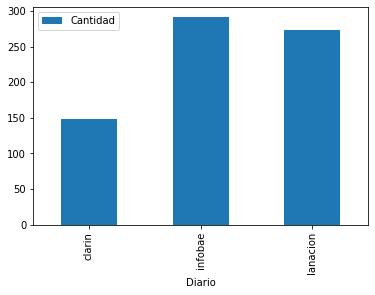

In [31]:
resumen.plot.bar(x='Diario',y='Cantidad')


---

Cantidades de noticias agrupadas por secciones (octubre 2019)

---


In [32]:
import numpy as np

# Convierte el atributo news.category como category
d = news_clean.category
secciones = d.astype('category').dtype
secciones.categories

# Agrupa las noticias por diario y categoría
e = news_clean.groupby(['category'])

# Genera un array numpay solo con la cantidad de noticias
f = np.array(e.aggregate(np.count_nonzero)['link'])

# Genera un dataframe con la cantidad de noticias por diario 
resumenSecciones = pd.DataFrame({"Sección":secciones.categories, 
                                 "Cantidad":f})
resumenSecciones

,Sección,Cantidad
0,deportes,199
1,economia,129
2,sociedad,184
3,tecnologia,201


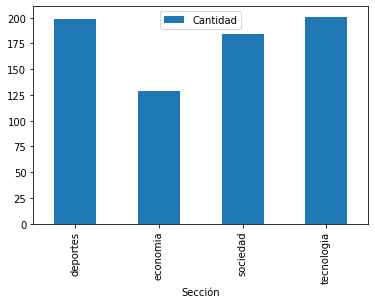

In [33]:
resumenSecciones.plot.bar(x='Sección',y='Cantidad')

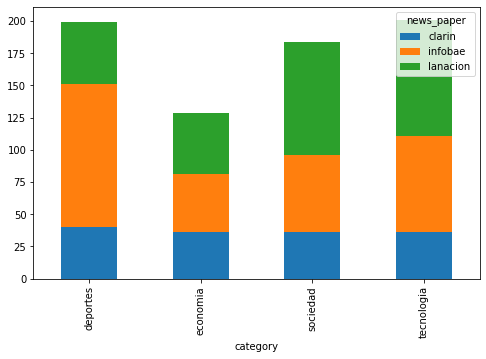

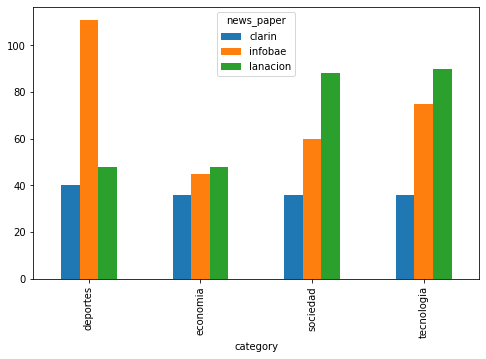

In [34]:
import numpy as np
z = news_clean.groupby(['news_paper', 'category'] )['category'].count().unstack('news_paper')
z.plot.bar(stacked=True, figsize = (8, 5))
z.plot.bar(figsize = (8, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa560c94160>,
      dtype=object)

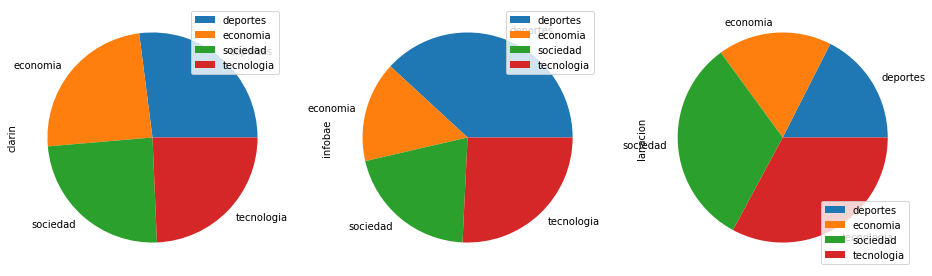

In [35]:
z = news_clean.groupby(['news_paper', 'category'] )['category'].count().unstack('news_paper')
z.plot.pie( subplots=True,figsize=(16, 8))

---

**Construcción de nuevos atributos**

Se genera el atributo *titleandbody* a partir de la concatenación de los atributos del dataset original *title* y *body*, ya que las cadenas que aparecen en dichos atributos son las que interesan en este trabajo.

---

In [36]:
news = news_clean[['news_paper','category','date']]
news['titleandbody'] = news_clean['title'].str.cat(news_clean['body'], sep =' // ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


---

**Exportación del dataset depurado**

Se exporta el dataset depurado en formato CSV como "TMnews.csv"

---

In [0]:
TMnews = news.to_csv (r'/content/drive/My Drive/Colab Notebooks/GIBDnews/data/GIBDnews-abril.csv', index = None, header=True) 
